In [1]:
import xcube
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regionmask
import seaborn as sns
from scalecast.Forecaster import Forecaster
from scalecast.SeriesTransformer import SeriesTransformer
from sklearn.preprocessing import MinMaxScaler

/home/luismaecker/.conda/envs/sif_env/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 13.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
from xcube.core.store import new_data_store
store = new_data_store("s3", root="deep-esdl-public", storage_options=dict(anon=True))
store.list_data_ids()

['LC-1x2160x2160-1.0.0.levels',
 'SMOS-freezethaw-1x720x720-1.0.1.zarr',
 'SMOS-freezethaw-4267x10x10-1.0.1.zarr',
 'black-sea-1x1024x1024.levels',
 'black-sea-256x128x128.zarr',
 'esa-cci-permafrost-1x1151x1641-0.0.2.levels',
 'esdc-8d-0.25deg-1x720x1440-3.0.1.zarr',
 'esdc-8d-0.25deg-256x128x128-3.0.1.zarr',
 'hydrology-1D-0.009deg-100x60x60-3.0.2.zarr',
 'hydrology-1D-0.009deg-1418x70x76-2.0.0.zarr',
 'hydrology-1D-0.009deg-1x1102x2415-2.0.0.levels',
 'hydrology-1D-0.009deg-1x1102x966-3.0.2.levels',
 'ocean-1M-9km-1x1080x1080-1.4.0.levels',
 'ocean-1M-9km-64x256x256-1.4.0.zarr',
 'polar-100m-1x2048x2048-1.0.1.zarr']

In [59]:
cube = store.open_data( 'esdc-8d-0.25deg-256x128x128-3.0.1.zarr')

cube = cube.sel(time=slice('2002-01-01','2021-12-31'))

lon_min, lon_max = 5.866, 15.042
lat_min, lat_max = 47.270, 55.058

cube_ger = cube.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

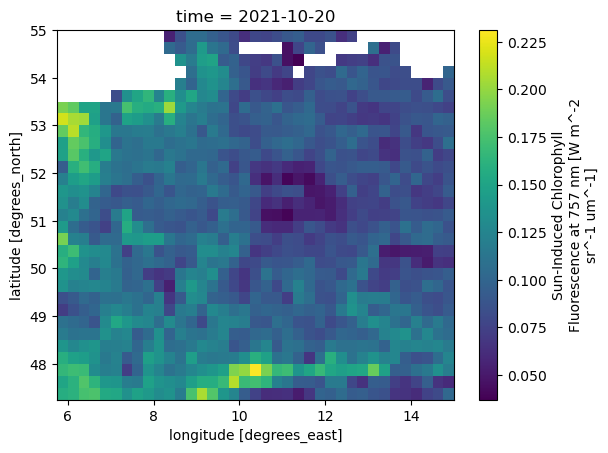

In [11]:
cube_ger.sif_gosif.isel(time=910).plot()

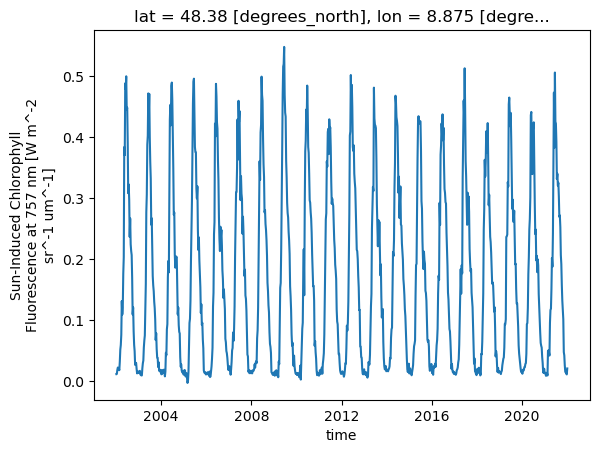

In [12]:
cube_ger.sif_gosif.isel(lat=4, lon=12).plot()

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_model(true_values, predicted_values, data_type='Train'):
    """
    Evaluates the model performance by calculating RMSE and MAE.

    Parameters:
    true_values (np.array): Array of true values.
    predicted_values (np.array): Array of predicted values.
    data_type (str): Type of data being evaluated (Train/Test). Default is 'Train'.

    Returns:
    None
    """
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    mae = mean_absolute_error(true_values, predicted_values)
    print(f'{data_type} Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'{data_type} Mean Absolute Error (MAE): {mae:.2f}')

# Example usage:
# Assuming trainY and testY are the true values for training and testing datasets
# and train_predict and test_predict are the predicted values from the model.

# For train predictions
evaluate_model(trainY, train_predict[:, 0], 'Train')

# For test predictions
evaluate_model(testY, test_predict[:, 0], 'Test')


Train Root Mean Squared Error (RMSE): 0.05
Train Mean Absolute Error (MAE): 0.03
Test Root Mean Squared Error (RMSE): 0.05
Test Mean Absolute Error (MAE): 0.04


In [73]:
variables = ["evaporation_era5",
            "precipitation_era5", 
            "radiation_era5", 
            "air_temperature_2m", 
            "max_air_temperature_2m", 
            "min_air_temperature_2m",
            "sif_gosif"]

ts_two = cube_ger[variables].isel(lat=4, lon=12).to_dataframe()
data = ts_two

Epoch 1/100


/home/luismaecker/.conda/envs/sif_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0761 - mae: 0.2070 - mse: 0.0761 - val_loss: 0.0210 - val_mae: 0.0995 - val_mse: 0.0210
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0197 - mae: 0.0992 - mse: 0.0197 - val_loss: 0.0065 - val_mae: 0.0573 - val_mse: 0.0065
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0068 - mae: 0.0611 - mse: 0.0068 - val_loss: 0.0034 - val_mae: 0.0399 - val_mse: 0.0034
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0042 - mae: 0.0464 - mse: 0.0042 - val_loss: 0.0024 - val_mae: 0.0342 - val_mse: 0.0024
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0035 - mae: 0.0452 - mse: 0.0035 - val_loss: 0.0022 - val_mae: 0.0336 - val_mse: 0.0022
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0034 - mae: 0.0440 - mse: 0.0034 - val_loss: 0.0022 - val_mae: 0.0331 - val_mse: 0.0022
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0031 - mae: 0.0419 - mse: 0.0031 - val_loss: 0.0020 - va

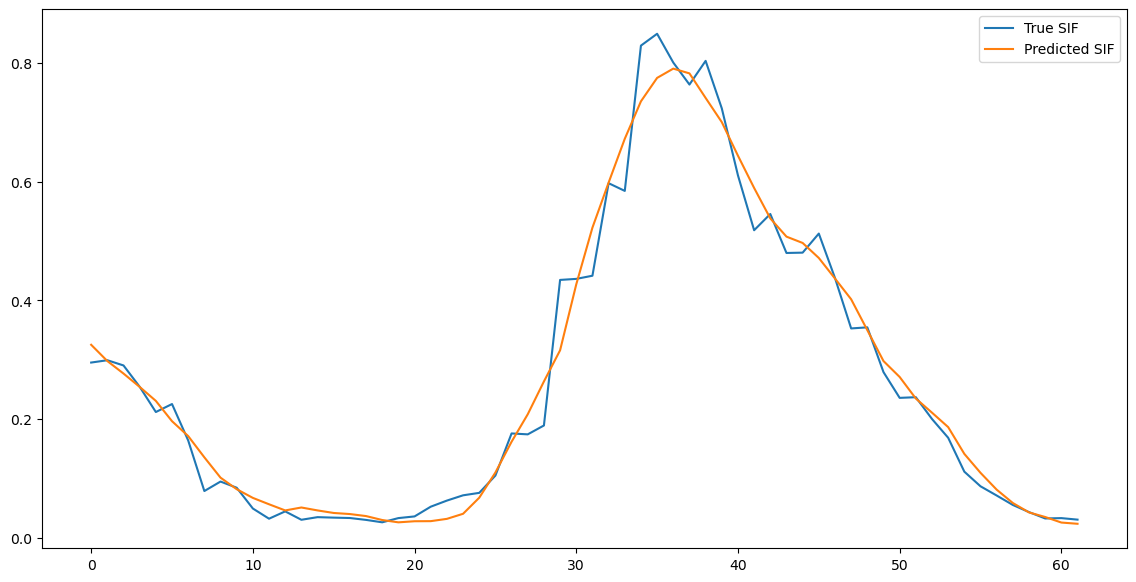

In [74]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Function to convert a time series dataset into a format suitable for LSTM
def convert2matrix(data_arr, look_back):
    X, Y = [], []
    for i in range(len(data_arr) - look_back):
        d = i + look_back  
        X.append(data_arr[i:d, :])  # Features: data points from i to d (exclusive)
        Y.append(data_arr[d, -1])  # Target: the value at the d-th position (assumes target is the last column)
    return np.array(X), np.array(Y)

# Load your data into a pandas DataFrame (assuming 'data' is already available)
# Select relevant features including the target variable
features = variables
data = data[features]

# Convert the data to float32 type for compatibility with Keras
data = data.astype('float32')

# Normalize the data to the range [0, 1] for better LSTM performance
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Split the data into training and testing sets based on the year
train_data = data[data.index.year <= 2017]
test_data = data[(data.index.year == 2018) | (data.index.year == 2019)]

train_size = len(train_data)
test_size = len(test_data)

train, test = data_scaled[:train_size, :], data_scaled[train_size:train_size + test_size, :]

# Set look_back period, which is the number of previous time steps to use as input features
look_back = 30

# Convert the training and testing data to the required format for LSTM
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

# Reshape input to be [samples, time steps, features]
# For LSTM, input shape should be (number of samples, look_back, number of features)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

# Define the LSTM model
def model_lstm(look_back, features):
    model = Sequential()
    # LSTM layer with 100 units, input_shape specifies the time steps and features
    model.add(LSTM(100, input_shape=(look_back, features), activation='relu'))
    # Dense layer with 1 unit for the output (predicting one value)
    model.add(Dense(1))
    # Compile the model with mean squared error loss and Adam optimizer
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
    return model

# Number of features (excluding the target variable for reshaping purposes)
num_features = trainX.shape[2]

# Build the LSTM model
model = model_lstm(look_back, num_features)

# Train the model
history = model.fit(trainX, trainY, epochs=100, batch_size=30, validation_data=(testX, testY), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Predict SIF values for the test data
test_predict = model.predict(testX)

# Evaluation function for model performance
def evaluate_model(true_values, predicted_values, data_type='Train'):
    """
    Evaluates the model performance by calculating RMSE and MAE.

    Parameters:
    true_values (np.array): Array of true values.
    predicted_values (np.array): Array of predicted values.
    data_type (str): Type of data being evaluated (Train/Test). Default is 'Train'.

    Returns:
    None
    """
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    mae = mean_absolute_error(true_values, predicted_values)
    print(f'{data_type} Root Mean Squared Error (RMSE): {rmse:.2f}')
    print(f'{data_type} Mean Absolute Error (MAE): {mae:.2f}')

# Evaluate the model on the train and test data
train_predict = model.predict(trainX)
evaluate_model(trainY, train_predict[:, 0], 'Train')
evaluate_model(testY, test_predict[:, 0], 'Test')

# Plot the true vs predicted SIF values for the test data
plt.figure(figsize=(14, 7))
plt.plot(range(len(testY)), testY, label='True SIF')
plt.plot(range(len(test_predict)), test_predict, label='Predicted SIF')
plt.legend()
plt.show()


# Model multiple timeseries

In [82]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the function to convert a time series dataset into a format suitable for LSTM
def convert2matrix(data_arr, look_back):
    X, Y = [], []
    for i in range(len(data_arr) - look_back):
        d = i + look_back  
        X.append(data_arr[i:d, :])  # Features: data points from i to d (exclusive)
        Y.append(data_arr[d, -1])  # Target: the value at the d-th position (assumes target is the last column)
    return np.array(X), np.array(Y)

# Open and subset the data
cube = store.open_data('esdc-8d-0.25deg-256x128x128-3.0.1.zarr')
cube = cube.sel(time=slice('2002-01-01', '2021-12-31'))

# Define the geographic boundaries for Germany
lon_min, lon_max = 5.866, 15.042
lat_min, lat_max = 47.270, 55.058

#lon_min, lon_max = 5.866, 6.542
#lat_min, lat_max = 47.270, 47.6058

cube_ger = cube.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

cube_ger

<xarray.Dataset> Size: 182MB
Dimensions:                            (time: 920, lat: 31, lon: 37)
Coordinates:
  * lat                                (lat) float64 248B 47.38 47.62 ... 54.88
  * lon                                (lon) float64 296B 5.875 6.125 ... 14.88
  * time                               (time) datetime64[ns] 7kB 2002-01-05 ....
Data variables: (12/42)
    aerosol_optical_thickness_550      (time, lat, lon) float32 4MB dask.array<chunksize=(222, 31, 25), meta=np.ndarray>
    air_temperature_2m                 (time, lat, lon) float32 4MB dask.array<chunksize=(222, 31, 25), meta=np.ndarray>
    bare_soil_evaporation              (time, lat, lon) float32 4MB dask.array<chunksize=(222, 31, 25), meta=np.ndarray>
    burnt_area                         (time, lat, lon) float64 8MB dask.array<chunksize=(222, 31, 25), meta=np.ndarray>
    cot                                (time, lat, lon) float32 4MB dask.array<chunksize=(222, 31, 25), meta=np.ndarray>
    cth                                (time, lat, lon) float32 4MB dask.array<chunksize=(222, 31, 25), meta=np.ndarray>
    ...                                 ...
    sif_rtsif                          (time, lat, lon) float32 4MB dask.array<chunksize=(222, 31, 25), meta=np.ndarray>
    sm                                 (time, lat, lon) float32 4MB dask.array<chunksize=(222, 31, 25), meta=np.ndarray>
    snow_sublimation                   (time, lat, lon) float32 4MB dask.array<chunksize=(222, 31, 25), meta=np.ndarray>
    surface_moisture                   (time, lat, lon) float32 4MB dask.array<chunksize=(222, 31, 25), meta=np.ndarray>
    terrestrial_ecosystem_respiration  (time, lat, lon) float32 4MB dask.array<chunksize=(222, 31, 25), meta=np.ndarray>
    transpiration                      (time, lat, lon) float32 4MB dask.array<chunksize=(222, 31, 25), meta=np.ndarray>
Attributes: (12/23)
    Conventions:                CF-1.9
    acknowledgment:             All ESDC data providers are acknowledged insi...
    contributor_name:           ['University of Leipzig', 'Max Planck Institu...
    contributor_url:            ['https://www.uni-leipzig.de/', 'https://www....
    creator_name:               ['University of Leipzig', 'Brockmann Consult ...
    creator_url:                ['https://www.uni-leipzig.de/', 'https://www....
    ...                         ...
    publisher_url:              https://www.earthsystemdatalab.net/
    time_coverage_end:          2021-12-31T00:00:00.000000000
    time_coverage_start:        1979-01-05T00:00:00.000000000
    time_period:                8D
    time_period_reported_day:   5.0
    title:                      Earth System Data Cube (ESDC) v3.0.1

In [83]:
# Initialize an empty list to hold all time series data
all_data_list = []

# Iterate over a selection of lat and lon points within the bounds
for lat in range(0, cube_ger.lat.size, 5):  # adjust step as necessary
    for lon in range(0, cube_ger.lon.size, 5):  # adjust step as necessary
        ts = cube_ger[variables].isel(lat=lat, lon=lon).to_dataframe()
        all_data_list.append(ts)

# Concatenate all the dataframes in the list into a single DataFrame
all_data = pd.concat(all_data_list)

# Reset index to have a single time index
all_data.reset_index(inplace=True)

# Filter the data for the years of interest and sort by time
all_data = all_data[all_data['time'].dt.year <= 2019]
all_data.sort_values('time', inplace=True)

# Convert the numerical columns to float32 type for compatibility with Keras
all_data[variables] = all_data[variables].astype('float32')

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
all_data_scaled = scaler.fit_transform(all_data[variables])

# Convert the scaled data back to a DataFrame for easier manipulation
all_data_scaled = pd.DataFrame(all_data_scaled, columns=variables)
all_data_scaled['time'] = all_data['time'].values  # Preserve the time column

# Split the data into training and testing sets based on the year
train_data = all_data_scaled[all_data_scaled['time'].dt.year <= 2017]
test_data = all_data_scaled[(all_data_scaled['time'].dt.year == 2018) | (all_data_scaled['time'].dt.year == 2019)]

# Drop the 'time' column for training and testing
train = train_data.drop(columns=['time']).values
test = test_data.drop(columns=['time']).values

# Set look_back period
look_back = 30

# Convert the training and testing data to the required format for LSTM
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))


In [99]:
print(trainX.shape)
print(trainY.shape)
print(trainX)
print(trainY)

(41186, 30, 7)
(41186,)
[[[9.04435933e-01 4.74948138e-06 1.61034465e-01 ... 2.32243389e-01
   4.48069513e-01 4.58450913e-02]
  [9.03082430e-01 4.40969840e-02 3.81272510e-02 ... 1.94078818e-01
   2.50354916e-01 3.59362811e-02]
  [9.13565218e-01 5.51068261e-02 2.90286988e-02 ... 1.89222038e-01
   2.19161272e-01 3.34376432e-02]
  ...
  [9.20051992e-01 1.17266988e-02 4.52926569e-02 ... 1.75108463e-01
   2.33040601e-01 4.09458019e-02]
  [9.25076962e-01 1.45858768e-02 1.08269423e-01 ... 7.75380284e-02
   2.07981944e-01 2.00625844e-02]
  [9.23685312e-01 2.26187418e-04 1.10708103e-01 ... 2.77046561e-02
   1.05643153e-01 2.12751590e-02]]

 [[9.03082430e-01 4.40969840e-02 3.81272510e-02 ... 1.94078818e-01
   2.50354916e-01 3.59362811e-02]
  [9.13565218e-01 5.51068261e-02 2.90286988e-02 ... 1.89222038e-01
   2.19161272e-01 3.34376432e-02]
  [9.06535387e-01 3.44856852e-03 5.20823263e-02 ... 2.36469865e-01
   4.64935184e-01 3.78408767e-02]
  ...
  [9.25076962e-01 1.45858768e-02 1.08269423e-01 ... 7

In [85]:

# Define the LSTM model
def model_lstm(look_back, features):
    model = Sequential()

    model.add(LSTM(100, input_shape=(look_back, features), activation='relu'))
   # model.add(Dense(64))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
    return model

# Number of features
num_features = trainX.shape[2]

# Build the LSTM model
model = model_lstm(look_back, num_features)

# Train the model
history = model.fit(trainX, trainY, epochs=20, batch_size=30, validation_data=(testX, testY), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Predict SIF values for the test data
test_predict = model.predict(testX)


Epoch 1/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 2/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 3/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 4/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 5/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 6/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 7/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: nan - mae: nan - mse: nan - val_loss: nan - val_mae: nan - val_mse: nan
Epoch 8/20
1373/1373 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step 

In [90]:
train_predict = model.predict(trainX)

(41186, 1)

In [94]:
train_predict

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], dtype=float32)

1288/1288 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
Train evaluation skipped due to insufficient data.
Test evaluation skipped due to insufficient data.


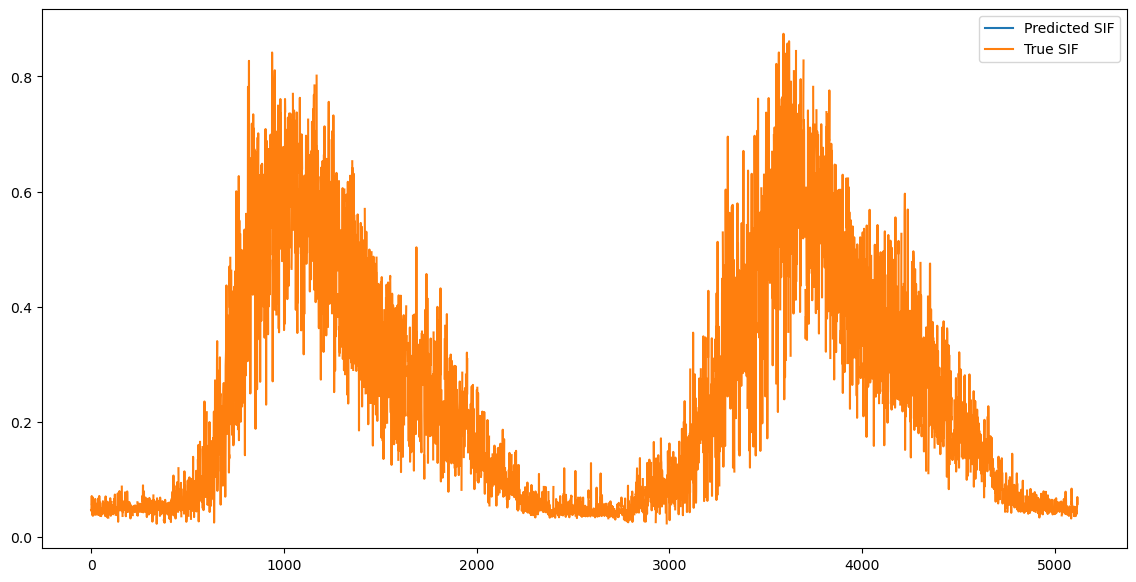

In [93]:
# Evaluation function for model performance
def evaluate_model(true_values, predicted_values, data_type='Train'):
    # Remove NaN values
    mask = ~np.isnan(predicted_values)
    true_values = true_values[mask]
    predicted_values = predicted_values[mask]
    
    if len(true_values) > 0 and len(predicted_values) > 0:
        rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
        mae = mean_absolute_error(true_values, predicted_values)
        print(f'{data_type} Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'{data_type} Mean Absolute Error (MAE): {mae:.2f}')
    else:
        print(f'{data_type} evaluation skipped due to insufficient data.')

# Evaluate the model on the train and test data
evaluate_model(trainY, train_predict[:, 0], 'Train')
evaluate_model(testY, test_predict[:, 0], 'Test')


# Plot the true vs predicted SIF values for the test data
plt.figure(figsize=(14, 7))
plt.plot(range(len(test_predict)), test_predict, label='Predicted SIF')
plt.plot(range(len(testY)), testY, label='True SIF')
plt.legend()
plt.show()

In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the function to convert a time series dataset into a format suitable for LSTM
def convert2matrix(data_arr, look_back):
    X, Y = [], []
    for i in range(len(data_arr) - look_back):
        d = i + look_back  
        X.append(data_arr[i:d, :])  # Features: data points from i to d (exclusive)
        Y.append(data_arr[d, -1])  # Target: the value at the d-th position (assumes target is the last column)
    return np.array(X), np.array(Y)

# Open and subset the data
cube = store.open_data('esdc-8d-0.25deg-256x128x128-3.0.1.zarr')
cube = cube.sel(time=slice('2002-01-01', '2021-12-31'))

# Define the geographic boundaries for Germany
lon_min, lon_max = 5.866, 15.042
lat_min, lat_max = 47.270, 55.058
cube_ger = cube.sel(lon=slice(lon_min, lon_max), lat=slice(lat_min, lat_max))

variables = [
    'sif_gosif',
    'radiation_era5',
    'root_moisture',
    'air_temperature_2m'
]

# Initialize an empty list to hold all time series data
all_data_list = []

# Iterate over a selection of lat and lon points within the bounds
for lat in range(0, cube_ger.lat.size, 5):  # adjust step as necessary
    for lon in range(0, cube_ger.lon.size, 5):  # adjust step as necessary
        ts = cube_ger[variables].isel(lat=lat, lon=lon).to_dataframe()
        all_data_list.append(ts)

# Concatenate all the dataframes in the list into a single DataFrame
all_data = pd.concat(all_data_list)

# Reset index to have a single time index
all_data.reset_index(inplace=True)

# Filter the data for the years of interest and sort by time
all_data = all_data[all_data['time'].dt.year <= 2019]
all_data.sort_values('time', inplace=True)

# Ensure no NaN or infinite values in the data
all_data = all_data.replace([np.inf, -np.inf], np.nan).dropna()

# Convert the numerical columns to float32 type for compatibility with Keras
all_data[variables] = all_data[variables].astype('float32')

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
all_data_scaled = scaler.fit_transform(all_data[variables])

# Convert the scaled data back to a DataFrame for easier manipulation
all_data_scaled = pd.DataFrame(all_data_scaled, columns=variables)
all_data_scaled['time'] = all_data['time'].values  # Preserve the time column

# Split the data into training and testing sets based on the year
train_data = all_data_scaled[all_data_scaled['time'].dt.year <= 2017]
test_data = all_data_scaled[(all_data_scaled['time'].dt.year == 2018) | (all_data_scaled['time'].dt.year == 2019)]

# Drop the 'time' column for training and testing
train = train_data.drop(columns=['time']).values
test = test_data.drop(columns=['time']).values

# Set look_back period
look_back = 30

# Convert the training and testing data to the required format for LSTM
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

# Define an improved LSTM model
def improved_model_lstm(look_back, features):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(look_back, features), activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
   # model.add(LSTM(50, activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
    return model

# Number of features
num_features = trainX.shape[2]

# Build the improved LSTM model
model = improved_model_lstm(look_back, num_features)

# Train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Predict SIF values for the test data
test_predict = model.predict(testX)

# Predict for test data

Epoch 1/100


/home/luismaecker/.conda/envs/sif_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1127/1127 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.0180 - mae: 0.0965 - mse: 0.0180 - val_loss: 0.0968 - val_mae: 0.2508 - val_mse: 0.0968
Epoch 2/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0127 - mae: 0.0902 - mse: 0.0127 - val_loss: 0.0082 - val_mae: 0.0692 - val_mse: 0.0082
Epoch 3/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0069 - mae: 0.0657 - mse: 0.0069 - val_loss: 0.0072 - val_mae: 0.0658 - val_mse: 0.0072
Epoch 4/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0060 - mae: 0.0606 - mse: 0.0060 - val_loss: 0.0054 - val_mae: 0.0563 - val_mse: 0.0054
Epoch 5/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0053 - mae: 0.0567 - mse: 0.0053 - val_loss: 0.0059 - val_mae: 0.0597 - val_mse: 0.0059
Epoch 6/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0050 - mae: 0.0548 - mse: 0.0050 - val_loss: 0.0051 - val_mae: 0.0556 - val_mse: 0.0051
Epoch 7/100
1127/1127 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0045 - mae: 0.0520 - mse

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [105]:
train_predict.shape

(36034, 30, 1)

In [115]:
print(testY.shape)
print(test_predict.shape)

(4478,)
(4478, 30, 1)


Train Root Mean Squared Error (RMSE): 0.05
Train Mean Absolute Error (MAE): 0.04
Test Root Mean Squared Error (RMSE): 0.05
Test Mean Absolute Error (MAE): 0.04


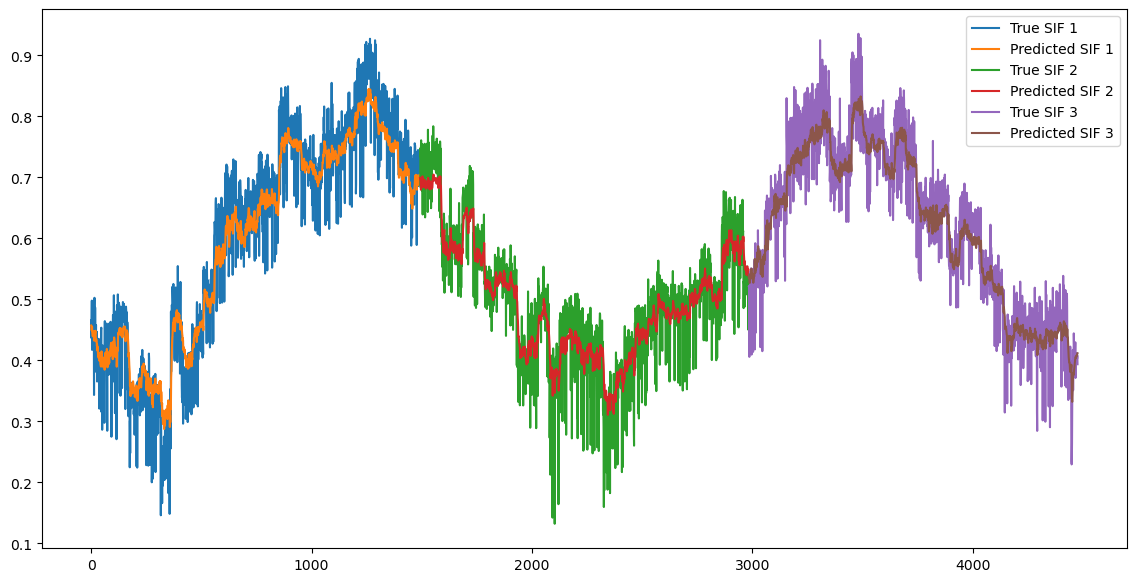

In [120]:
# Flatten predictions to match the shape of true values
#train_predict = train_predict[:, -1, 0]
#test_predict = test_predict[:, -1, 0]

# Evaluation function for model performance
def evaluate_model(true_values, predicted_values, data_type='Train'):
    # Remove NaN values
    mask = ~np.isnan(predicted_values)
    true_values = true_values[mask]
    predicted_values = predicted_values[mask]
    
    if len(true_values) > 0 and len(predicted_values) > 0:
        rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
        mae = mean_absolute_error(true_values, predicted_values)
        print(f'{data_type} Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'{data_type} Mean Absolute Error (MAE): {mae:.2f}')
    else:
        print(f'{data_type} evaluation skipped due to insufficient data.')

# Evaluate the model on the train and test data
evaluate_model(trainY, train_predict, 'Train')
evaluate_model(testY, test_predict, 'Test')

# Plot the true vs predicted SIF values for the test data for 10 series
plt.figure(figsize=(14, 7))
num_series = 3
points_per_series = len(testY) // num_series
for i in range(num_series):
    start = i * points_per_series
    end = start + points_per_series
    plt.plot(range(start, end), testY[start:end], label=f'True SIF {i+1}')
    plt.plot(range(start, end), test_predict[start:end], label=f'Predicted SIF {i+1}')
plt.legend()
plt.show()

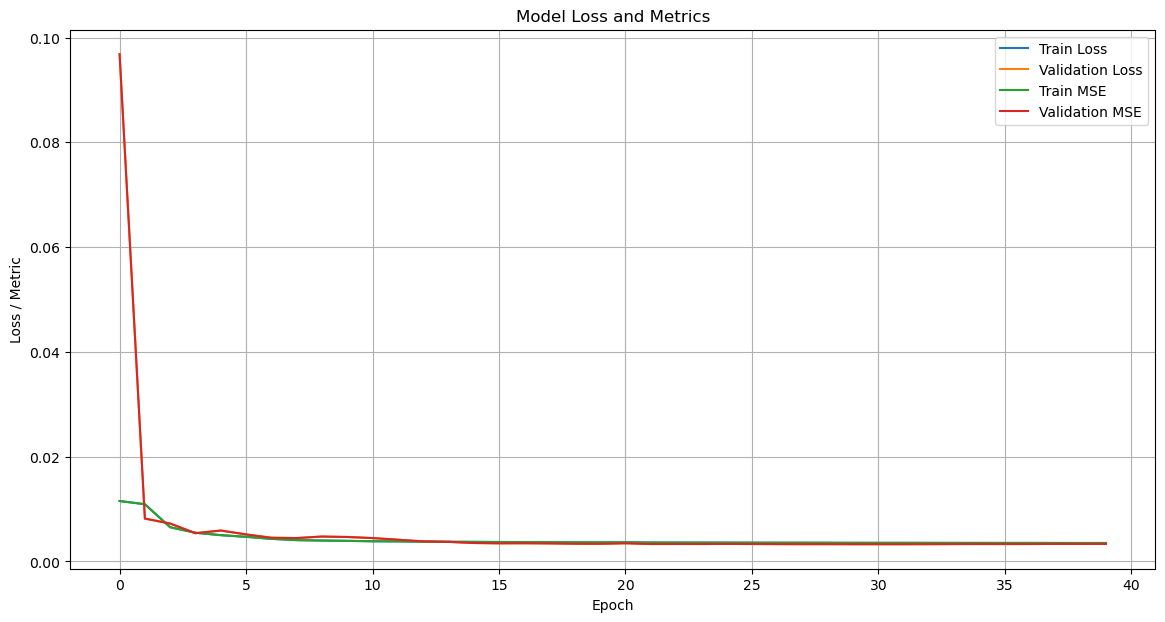

In [112]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
#plt.plot(history.history['mae'], label='Train MAE')
#plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Loss and Metrics')
plt.xlabel('Epoch')
plt.ylabel('Loss / Metric')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the function to convert a time series dataset into a format suitable for LSTM
def convert2matrix(data_arr, look_back):
    X, Y = [], []
    for i in range(len(data_arr) - look_back):
        d = i + look_back  
        X.append(data_arr[i:d, :])  # Features: data points from i to d (exclusive)
        Y.append(data_arr[d, -1])  # Target: the value at the d-th position (assumes target is the last column)
    return np.array(X), np.array(Y)

# Ensure no NaN or infinite values in the data
all_data = all_data.replace([np.inf, -np.inf], np.nan).dropna()

# Convert the numerical columns to float32 type for compatibility with Keras
all_data[variables] = all_data[variables].astype('float32')

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
all_data_scaled = scaler.fit_transform(all_data[variables])

# Convert the scaled data back to a DataFrame for easier manipulation
all_data_scaled = pd.DataFrame(all_data_scaled, columns=variables)
all_data_scaled['time'] = all_data['time'].values  # Preserve the time column

# Split the data into training, validation, and testing sets based on the year
train_data = all_data_scaled[all_data_scaled['time'].dt.year <= 2016]
val_data = all_data_scaled[all_data_scaled['time'].dt.year == 2017]
test_data = all_data_scaled[all_data_scaled['time'].dt.year == 2018]

# Drop the 'time' column for training, validation, and testing
train = train_data.drop(columns=['time']).values
val = val_data.drop(columns=['time']).values
test = test_data.drop(columns=['time']).values

# Set look_back period
look_back = 50

# Convert the training, validation, and testing data to the required format for LSTM
trainX, trainY = convert2matrix(train, look_back)
valX, valY = convert2matrix(val, look_back)
testX, testY = convert2matrix(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0], valX.shape[1], valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

# Define an improved LSTM model
def improved_model_lstm(look_back, features):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(look_back, features), activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
   # model.add(LSTM(50, activation='relu'))
   # model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
    return model

# Number of features
num_features = trainX.shape[2]

# Build the improved LSTM model
model = improved_model_lstm(look_back, num_features)

# Train the model
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(valX, valY), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Predict SIF values for the validation and test data
val_predict = model.predict(valX).flatten()
test_predict = model.predict(testX).flatten()

# Evaluation function for model performance
def evaluate_model(true_values, predicted_values, data_type='Validation'):
    # Remove NaN values
    mask = ~np.isnan(predicted_values)
    true_values = true_values[mask]
    predicted_values = predicted_values[mask]
    
    if len(true_values) > 0 and len(predicted_values) > 0:
        rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
        mae = mean_absolute_error(true_values, predicted_values)
        print(f'{data_type} Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'{data_type} Mean Absolute Error (MAE): {mae:.2f}')
    else:
        print(f'{data_type} evaluation skipped due to insufficient data.')

# Evaluate the model on the validation and test data
evaluate_model(valY, val_predict, 'Validation')
evaluate_model(testY, test_predict, 'Test')

# Plot the true vs predicted SIF values for the validation and test data for 10 series
plt.figure(figsize=(14, 7))
num_series = 10
points_per_series = len(testY) // num_series
for i in range(num_series):
    start = i * points_per_series
    end = start + points_per_series
    plt.plot(range(start, end), testY[start:end], label=f'True SIF {i+1}')
    plt.plot(range(start, end), test_predict[start:end], label=f'Predicted SIF {i+1}')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Loss and Metrics')
plt.xlabel('Epoch')
plt.ylabel('Loss / Metric')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Epoch 1/10


/home/luismaecker/.conda/envs/sif_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1055/1055 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - loss: 0.0215 - mae: 0.1055 - mse: 0.0215 - val_loss: 0.0062 - val_mae: 0.0642 - val_mse: 0.0062
Epoch 2/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - loss: 0.0076 - mae: 0.0693 - mse: 0.0076 - val_loss: 0.0514 - val_mae: 0.1715 - val_mse: 0.0514
Epoch 3/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 0.0117 - mae: 0.0860 - mse: 0.0117 - val_loss: 0.0115 - val_mae: 0.0856 - val_mse: 0.0115
Epoch 4/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 0.0080 - mae: 0.0712 - mse: 0.0080 - val_loss: 0.0099 - val_mae: 0.0798 - val_mse: 0.0099
Epoch 5/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 0.0072 - mae: 0.0673 - mse: 0.0072 - val_loss: 0.0086 - val_mae: 0.0747 - val_mse: 0.0086
Epoch 6/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 0.0067 - mae: 0.0648 - mse: 0.0067 - val_loss: 0.0059 - val_mae: 0.0604 - val_mse: 0.0059
Epoch 7/10
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - loss: 0.0061 - mae: 0.0619 - 

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2204 but corresponding boolean dimension is 110200

In [122]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Define the function to convert a time series dataset into a format suitable for LSTM
def convert2matrix(data_arr, look_back):
    X, Y = [], []
    for i in range(len(data_arr) - look_back):
        d = i + look_back  
        X.append(data_arr[i:d, :])  # Features: data points from i to d (exclusive)
        Y.append(data_arr[d, -1])  # Target: the value at the d-th position (assumes target is the last column)
    return np.array(X), np.array(Y)

# Ensure no NaN or infinite values in the data
all_data = all_data.replace([np.inf, -np.inf], np.nan).dropna()

# Convert the numerical columns to float32 type for compatibility with Keras
all_data[variables] = all_data[variables].astype('float32')

# Normalize the data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
all_data_scaled = scaler.fit_transform(all_data[variables])

# Convert the scaled data back to a DataFrame for easier manipulation
all_data_scaled = pd.DataFrame(all_data_scaled, columns=variables)
all_data_scaled['time'] = all_data['time'].values  # Preserve the time column

# Split the data into training, validation, and testing sets based on the year
train_data = all_data_scaled[all_data_scaled['time'].dt.year <= 2016]
val_data = all_data_scaled[all_data_scaled['time'].dt.year == 2017]
test_data = all_data_scaled[all_data_scaled['time'].dt.year == 2018]

# Drop the 'time' column for training, validation, and testing
train = train_data.drop(columns=['time']).values
val = val_data.drop(columns=['time']).values
test = test_data.drop(columns=['time']).values

# Set look_back period
look_back = 30

# Convert the training, validation, and testing data to the required format for LSTM
trainX, trainY = convert2matrix(train, look_back)
valX, valY = convert2matrix(val, look_back)
testX, testY = convert2matrix(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], trainX.shape[2]))
valX = np.reshape(valX, (valX.shape[0], valX.shape[1], valX.shape[2]))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], testX.shape[2]))

# Define an improved LSTM model
def improved_model_lstm(look_back, features):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=(look_back, features), activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(50, return_sequences=True, activation='relu'))
    model.add(Dropout(0.2))
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae'])
    return model

# Number of features
num_features = trainX.shape[2]

# Build the improved LSTM model
model = improved_model_lstm(look_back, num_features)

# Train the model
history = model.fit(trainX, trainY, epochs=100, batch_size=32, validation_data=(valX, valY), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

# Predict SIF values for the validation and test data
val_predict = model.predict(valX).flatten()
test_predict = model.predict(testX).flatten()

# Evaluation function for model performance
def evaluate_model(true_values, predicted_values, data_type='Validation'):
    # Remove NaN values
    mask = ~np.isnan(predicted_values)
    true_values = true_values[mask]
    predicted_values = predicted_values[mask]
    
    if len(true_values) > 0 and len(predicted_values) > 0:
        rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
        mae = mean_absolute_error(true_values, predicted_values)
        print(f'{data_type} Root Mean Squared Error (RMSE): {rmse:.2f}')
        print(f'{data_type} Mean Absolute Error (MAE): {mae:.2f}')
    else:
        print(f'{data_type} evaluation skipped due to insufficient data.')

# Evaluate the model on the validation and test data
evaluate_model(valY, val_predict, 'Validation')
evaluate_model(testY, test_predict, 'Test')

# Plot the true vs predicted SIF values for the validation and test data for 10 series
plt.figure(figsize=(14, 7))
num_series = 10
points_per_series = len(testY) // num_series
for i in range(num_series):
    start = i * points_per_series
    end = start + points_per_series
    plt.plot(range(start, end), testY[start:end], label=f'True SIF {i+1}')
    plt.plot(range(start, end), test_predict[start:end], label=f'Predicted SIF {i+1}')
plt.legend()
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(14, 7))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['mse'], label='Train MSE')
plt.plot(history.history['val_mse'], label='Validation MSE')
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Loss and Metrics')
plt.xlabel('Epoch')
plt.ylabel('Loss / Metric')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


Epoch 1/100


/home/luismaecker/.conda/envs/sif_env/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


 139/1056 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - loss: 0.0527 - mae: 0.1843 - mse: 0.0527

KeyboardInterrupt: 